# 020.KNN (K-Nearest Neighbors, 최근접 이웃)

### iris dataset

iris.feature_names : 

Sepal Length : 꽃받침 길이  
Sepal Width  : 꽃받침 너비   
Petal Length  : 꽃잎 길이  
Petal Width   :  꽃잎 너비 

Species (꽃의 종류) :  setosa / versicolor / virginica 의 3종류로 구분된다.

**꽃받침 길이, 너비 두가지 feature 를 가지고 KNN 알고리즘을 이용하여 꽃의 종류 분류**

**neighbors.KNeighborsClassifier(n_neighbors, weights=weights)**
- 젤 중요한 파라미터 n_neighbors : K 이웃을 몇 개 줄기
- weights : 거리 계산할 때 단순하게 동일하게 그냥 거리만 가지고 계산 할 건지 가중치,
  멀고 가까움에 따라서 가중치를 무시하고 그냥 가까운데나 멀리 있는거나 n_neighbors 몇 개 안에 들어가는 것을 똑같이 간주할 것인지 아니면 weight equal distance를 하면 거리에 반비례해서 가중치를 좀 조정하는 것
멀리 떨어져 있는 것은 가중치를 적게 주고, 가까운 것은 가중치를 많이 주는 방식.

- weights :  

    - uniform : uniform weights. 모든 neighbor 의 가중치를 동일하게 취급  
    - distance : neighbor 의 거리에 반비례하여 가중치 조정

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = load_iris()
iris
# target이 sort이 안되어 있음 그래서 데이터를 섞어야됨 --> 데이터를 미리 파악하는게 중요함 
# 섞어서 랜덤 셔플을 하지 않고 사용하면 훈련 세트는 전부 앞이 0하고 1인 세토사하고 베르시콜라 종으로만
# 훈련을 시키고 예측은 2, 머지니카를 시키고 이런 일이 일어남!!
# 그래서 데이터를 잘 섞어야함  

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.data.shape

(150, 4)

In [4]:
iris.feature_names, iris.target_names # 0,1,2이 매칭
# 0 : setosa , 1 : versicolor, 2 : virginica

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [5]:
X = iris.data[:,:2]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

In [6]:
from sklearn.model_selection import train_test_split
# train_test_split이라고 하는 함수에다가 x,y 입력 피처가 되는 x 값하고 그 정답 값 y 두 개를 주면
# 아래와 같이 4개로 분리해줌, 여기에 테스트 사이즈 0.2 이렇게 주면 80% 는 훈련 세트로 쓰고 20%는 테스트 세트로 쓴다
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 100)
# 데이터가 안 섞여 있는데 얘가 랜덤하게 셔플을 해줘서 섞은 다음에 8:2로 분할해줌 
# 그럴때 랜덤이라는게 들어가니깐 random_state에 어떤 값을 주면 맨날 같은  랜덤 숫자가 생성되면서 똑같이 나눠짐 
# 강사님과 같은 X 테스트로 나눠지기 때문에 나중에 훈련시킨 다음에도 결과가 동일하게 나옴 

X_train.shape, X_test.shape, y_train.shape, y_test.shape # 150을 8(120):2(30)으로 나눠줌.

((112, 2), (38, 2), (112,), (38,))

In [7]:
#두 개의 변수가 x축과 y축으로 가고 그러면 
#이제 그 값이 뭘로 예측하는냐 하는 z축이 문제가 됨. x 하고 y 두개를 우리가 변수 축으로 썼기 때문에 
#정답을 뭘로 맞출거냐 0,1,2 중에 이제 이걸 표현하는게 이걸 색깔로 표현하게 되면 2차원 공간 안에서 
## 3차원 정보를 표현하는 방법이 색으로 표현하는 방법
#- 예를 들어 꽃받침의 길이, 꽃받침의 너비 이렇게 하면 꽃받침의 길이가 얼마이고 꽃받침의 너비가 얼마일때 
#무슨 종이냐라는 것을 꽃받침의 길이가 예를 들어서 5.0이고 꽃받침의 너비가 3.0 이런 것은 0번 세토사이다
#이렇게 표현 가능

### KNN object 생성 및 train

In [8]:
clf = KNeighborsClassifier(n_neighbors=15, weights = "distance") #uniform, distance 두 가지가 있음
# uniform으로 지정해줘서 특별히 거리에 따라서 가중치를 주지 않겠다. 
# 가중치 파라미터를 distance으로 바꾸니깐 정확도가 81% 까지 올라갔음.
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [9]:
y_pred = clf.predict(X_test)
y_pred # 예측한 값

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0,
       1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1])

In [10]:
y_test # 실제 정답 레이블 값, 위에 예측한 값이랑 비교하면 맞은 것도 있고 틀린 것도 있고 제각각임

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1])

### 예측의 정확도 평가

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # 66% 밖에 못 맞
# test_size = 0.25로 바꾸고 random_state = 100, weights = 'distance'로 조정하니깐 81%까지 올라감
# 전통적인 머신 러닝은 파라미터 조정하기. 파라미터를 어떻게 최적의 파라미터를 찾아내느냐 --> 하이퍼파라미터라고 부름.
# 사람이 직접 정해주는 하이퍼파라미터들. 

0.8157894736842105

In [23]:
y_train

array([2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2,
       0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 1,
       1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       0, 0])

In [25]:
y_train == 0
# true인 것이 y_train = 0인것, 그러면 이거에 맞는 X_train값이 나옴 

array([False, False,  True, False, False, False,  True,  True,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False,  True,  True,  True, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True, False,  True,  True, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True,  True])

In [26]:
X_train[y_train == 0] #[]안에 있는 조건에 맞는 X_train만 나옴 

array([[4.5, 2.3],
       [4.9, 3.6],
       [4.6, 3.4],
       [5. , 3. ],
       [5.1, 3.7],
       [4.9, 3.1],
       [5.1, 3.3],
       [5. , 3.2],
       [4.6, 3.6],
       [5.5, 4.2],
       [4.4, 3.2],
       [5.4, 3.9],
       [5.5, 3.5],
       [5. , 3.5],
       [5.4, 3.7],
       [4.6, 3.1],
       [5.1, 3.5],
       [4.3, 3. ],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [4.4, 3. ],
       [5.1, 3.4],
       [5.3, 3.7],
       [4.8, 3.1],
       [5.2, 3.5],
       [5.1, 3.8],
       [4.7, 3.2],
       [4.6, 3.2],
       [5. , 3.3],
       [5. , 3.4],
       [5. , 3.6],
       [4.9, 3.1],
       [5.8, 4. ],
       [4.8, 3.4],
       [4.4, 2.9]])

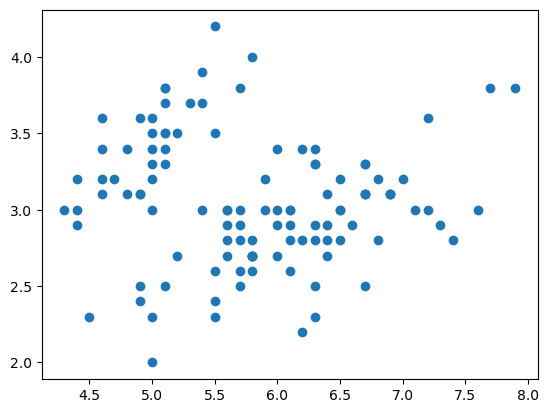

In [27]:
import matplotlib.pyplot as plt
X_train # 앞에 거를 X축에 놓고 뒤에 거를 Y축으로 놓아서 시각화를 할 거임.
plt.scatter(X_train[:,0] , X_train[:,1])
# 아직 색깔로 구분이 안되어 있음 --> 색깔로 3차원 정보를 시각화하고자 함!
# 이건 전체를 다 그린 코드, 색깔 구분을 해줘야함 !!!

array([2])

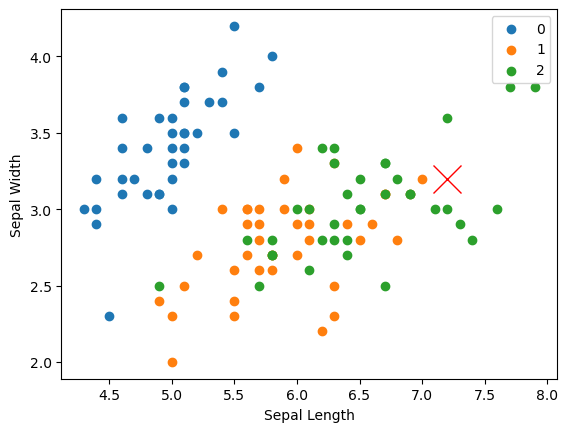

In [47]:
plt.scatter(X_train[y_train == 0, 0] , X_train[y_train ==0, 1] , label = 0) # y_train이 0인 것만 골라내서 분리한 인덱싱.
# y_train = 0 인 것만 산점도에 표시가 됨.
plt.scatter(X_train[y_train == 1, 0] , X_train[y_train == 1, 1] , label = 1) # y_train = 1 인 것을 골라냄
plt.scatter(X_train[y_train == 2, 0] , X_train[y_train == 2, 1], label = 2) # y_train = 2인 것만을 골라냄.

# for문으로 구현하기 
# for i in range(3):
#    plt.scatter(X_train[y_train == i,0] , X_train[y_train == i , 1])

plt.plot(X_test[20, 0] , X_test[20,1] , c = "r" , marker = "x" , markersize = 20)
plt.legend()
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
clf.predict(X_test[20:21])
# 해당 데이터 포인트가 2번을 맞춘거임(virginica)
# 새로운 X라는 포인트가 왔을 때 15개, 우리가 지금 이웃을 15개로 줬으니깐 15개를 씌워보면 초록색 포인트가 제일 많을거다.
# 새로운 X 포인트가 초록색 포인트로 예측한 것은 시각적으로 우리가 그린 것과 일치함. 

In [38]:
y_train[20]

2

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# 0을 0으로 제대로 맞춘게 14
# 두번째 열은 1을 1으로 제대로 맞춘게 6개, 2를 3으로 잘못 맞춘게 3개임

[[14  0  0]
 [ 0  6  4]
 [ 0  3 11]]


Text(0.5, 14.722222222222216, 'Predicted')

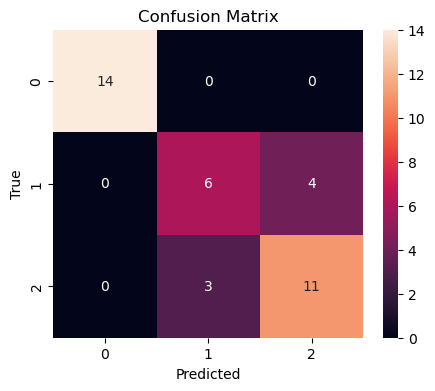

In [44]:
import seaborn as sns #matplotlib 그리는건 조금 까다로움, seaborn은 굉장히 쉽게 그릴 숭 있음
# seaborn이 전부 100% matplotlib으로 만들어져있음.
plt.figure(figsize = (5,4))
ax = sns.heatmap(cm , annot = True, fmt = 'd') # 위에 있는 배열 숫자 값들이 여기에 그림이 그려짐.
ax.set_title("Confusion Matrix")
ax.set_ylabel("True")
ax.set_xlabel("Predicted")
# 검정색으로 표현된 것은 데이터가 없는 부분, 환한 부분은 데이터가 많은 부분. 
# 14는 0을 0으로 제데로 100% 다 맞춘것. --> sepal-length, width 2개의 피만 갖고 있으면 쉽게 구분이 가능한 종류 
# 베르시콜라, 버지니아는 이 2개의 피처만으론 구분하기 쉽지 않은 종 (4가지 특성을 다 사용해야함)
# 두번째, 베르시콜라 종은 6개는 제대로 맞췄고 베르시콜라를 버지니카로 잘못 맞춘게 4개임. 
# 세번째, 버지니카를 제대로 맞춘건 대각선 부분에 11개
# 버지니카를 베르시 콜라로 잘못 맞춘게 3개가 있음. 

In [46]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 실습

n_neighbors 를 변경하여 Test. Visualization 을 통하여 위 결과와 비교.